In [3]:
# %pylab inline						# inline lets you plot figures inline, instead of in a new window or shell
import numpy as np					# provides a high-performance multidimensional array and basic tools to compute with and manipulate 									these arrays
import pandas as pd     			#library for managing relational (i.e. table-format) datasets
import seaborn as sns   			#for plotting and styling
import matplotlib.pyplot as plt

In [16]:
genes_per_strain =  pd.read_csv("../data/s23_heatmap/combined_top30.csv") # first read it in and convert it to a dataframe using pandas

genes_per_strain.head()
# genes_per_strain = genes_per_strain.pivot("Strain", "Gene", "No_of_mutations") 

,Strain,Gene,No_of_mutations
0,TKK-01-0001.annotated.vcf,RVBD_0355c,5255
1,TKK-01-0001.annotated.vcf,RVBD_0305c,2101
2,TKK-01-0001.annotated.vcf,RVBD_1917c,2054
3,TKK-01-0001.annotated.vcf,RVBD_2356c,1310
4,TKK-01-0001.annotated.vcf,RVBD_3514,1237


In [19]:
genes_per_strain_pivot = genes_per_strain.pivot("Strain", "Gene", "No_of_mutations") 
filled_genes_per_strain_pivot = genes_per_strain_pivot.fillna(0)
filled_genes_per_strain_

<Figure size 1440x1440 with 0 Axes>

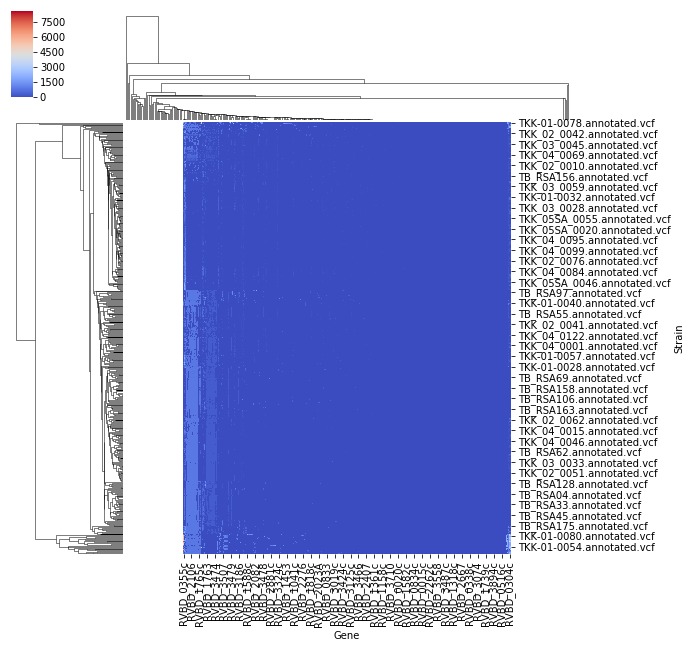

In [33]:
fig = plt.figure(figsize=(20, 20))
heatmap = sns.clustermap(filled_genes_per_strain_pivot, cmap = 'coolwarm', square=True)


In [26]:
filled_genes_per_strain_pivot.max9

8666.0

In [30]:
norm_variant = filled_genes_per_strain_pivot / filled_genes_per_strain_pivot.max().max()

<Figure size 1440x1440 with 0 Axes>

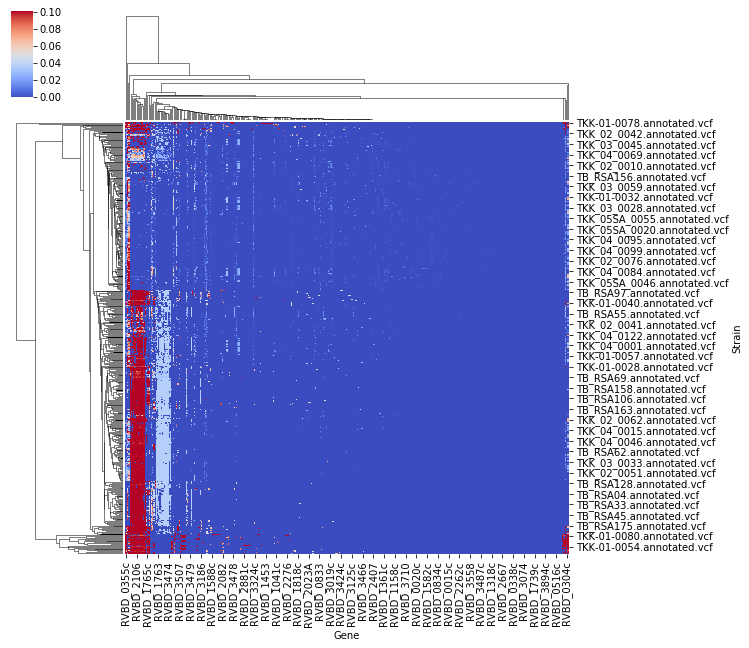

In [35]:
fig = plt.figure(figsize=(20, 20))
heatmap = sns.clustermap(norm_variant, cmap = 'coolwarm', robust=True)


<Figure size 1440x1440 with 0 Axes>

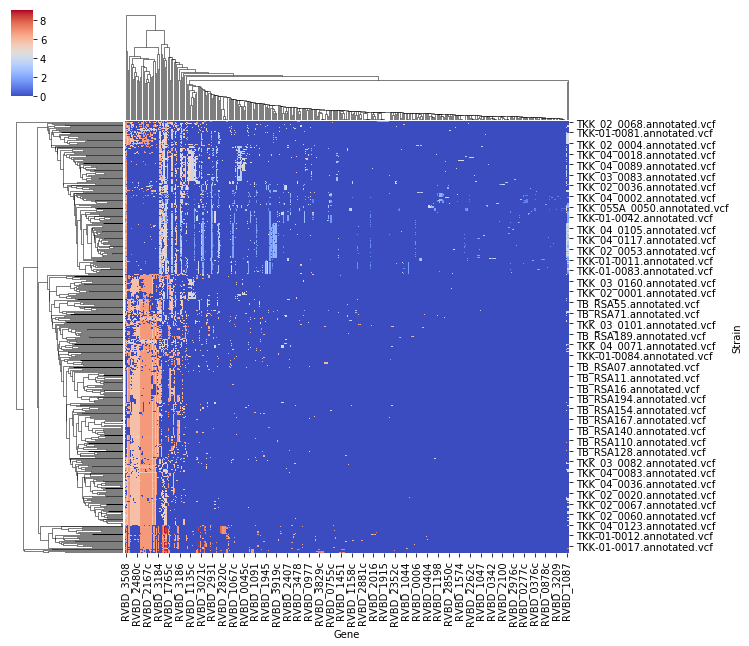

In [46]:
fig = plt.figure(figsize=(20, 20))

sns.clustermap(genes_per_strain_pivot.apply(np.log).replace([np.inf, -np.inf], np.nan).fillna(0), cmap = 'coolwarm')